# Comparação entre China e Itália Covid-19

In [30]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns 
import plotly.express as px

In [31]:
# importing datasets
full_table = pd.read_csv('https://raw.githubusercontent.com/pesobreiro/jupyternotebooks/master/dados/covid.csv',parse_dates=['Date'],index_col=0)

full_table.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
11980,"Suffolk County, NY",US,40.9849,-72.6151,2020-03-08,1,0,0
11981,"Ulster County, NY",US,41.8586,-74.3118,2020-03-08,1,0,0
11982,"Unassigned Location, VT",US,44.3378,-72.7563,2020-03-08,1,0,0
11983,"Unknown Location, MA",US,42.4072,-71.3824,2020-03-08,1,0,0
11984,"Volusia County, FL",US,29.0280,-81.0755,2020-03-08,1,0,0


In [32]:
# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values with NA
full_table[['Province/State']] = full_table[['Province/State']].fillna('NA')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



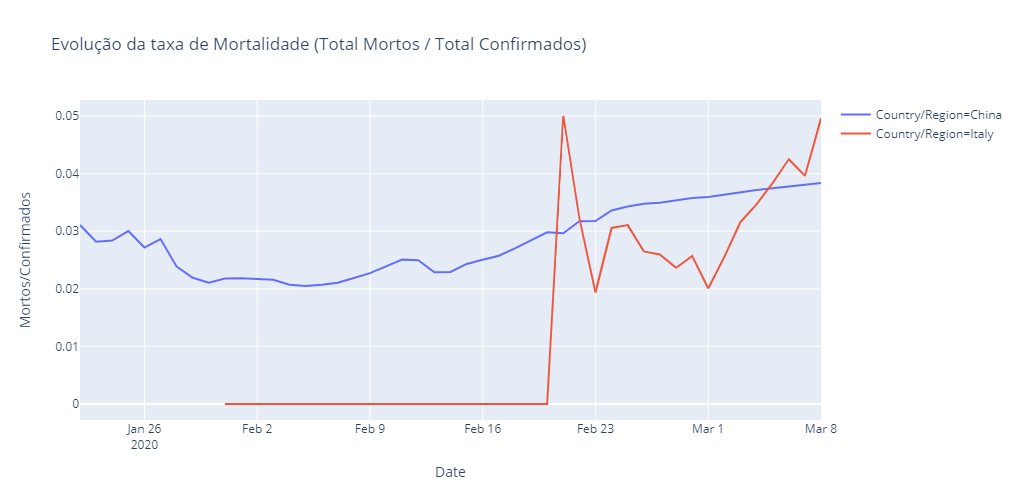

In [33]:
full_table = full_table.loc[(full_table['Country/Region']=='Italy') | (full_table['Country/Region']=='China')]
temp = full_table.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum()

temp = temp.reset_index()
temp['Mortos/Confirmados'] = temp['Deaths']/temp['Confirmed']


fig = px.line(temp, x="Date", y="Mortos/Confirmados", color='Country/Region',  height=500,width=1000,
             title='Evolução da taxa de Mortalidade (Total Mortos / Total Confirmados)')
fig.show()

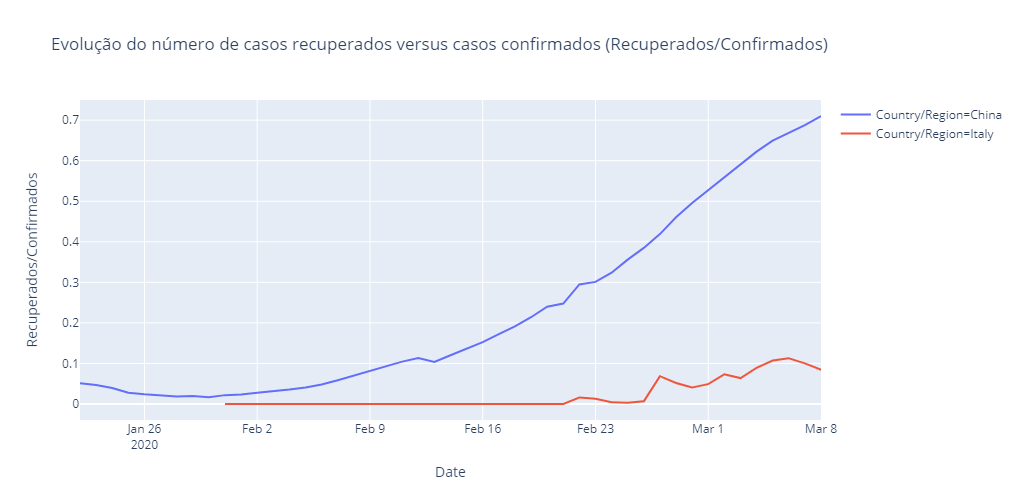

In [34]:
temp['Recuperados/Confirmados'] = temp['Recovered']/temp['Confirmed']

fig = px.line(temp, x="Date", y="Recuperados/Confirmados", color='Country/Region',  height=500,width=1000,
             title='Evolução do número de casos recuperados versus casos confirmados (Recuperados/Confirmados)')
fig.show()